In [13]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from mnist_load import *
from cnn_simple_net import SimpleCnn
import train
import imp

In [14]:
imp.reload(train)

<module 'train' from 'E:\\Software\\MachineLearning\\PRML\\train.py'>

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)
max_epochs = 2

In [16]:
network = SimpleCnn(input_dim=(1,28,28), 
                    conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                    hidden_size=100, output_size=10, weight_init_std=0.01)

train = Train(network, x_train, t_train, x_test, t_test,
              epochs=max_epochs, mini_batch_size=100,
              optimizer='Adam', optimizer_param={'lr': 0.001},
              evaluate_sample_num_per_epoch=1000, verbose=False)

In [17]:
train.train()

In [34]:
from common.util import *

In [35]:
loss_list = smooth_curve(train.train_loss_list)
iter_no = 0
iter_list = []
for _ in loss_list:
    iter_no += 1
    iter_list.append(iter_no)

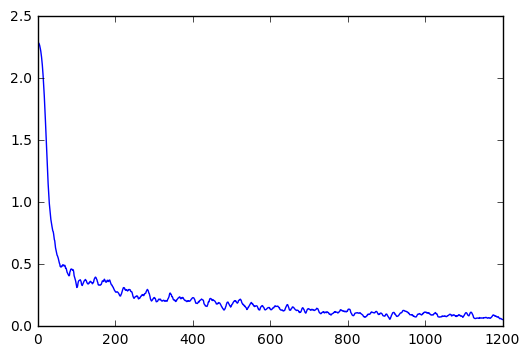

In [39]:
plt.plot(iter_list, loss_list, 'blue')
#plt.plot(iter_list, train.train_accuracy_list)
#plt.plot(iter_list, train.test_accuray_list, 'black')
#plt.yscale('log')
plt.show()